In [2]:
import numpy as np

# Create two NumPy arrays
odd_array = np.array([1, 3, 5, 7, 9])
even_array = np.array([0, 2, 4, 6, 8])

# Create an index array for odd and even indices
indices = np.arange(len(odd_array))

# Get odd and even indices
odd_indices = indices % 2 == 1
even_indices = indices % 2 == 0

# Combine the odd-indexed elements from odd_array and even-indexed elements from even_array
result_array = np.where(odd_indices, odd_array, even_array)

print(result_array)

[0 3 4 7 8]


In [ ]:
indices

In [ ]:
odd_indices

## Incorporating Beta

In [3]:
A = np.arange(20, 30)
A

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [4]:
B = np.arange(0, 32)
B

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [5]:
lam = 0.3
indices = np.arange(len(B))
indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [6]:
mix = indices % 4 == 0
mix

array([ True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False])

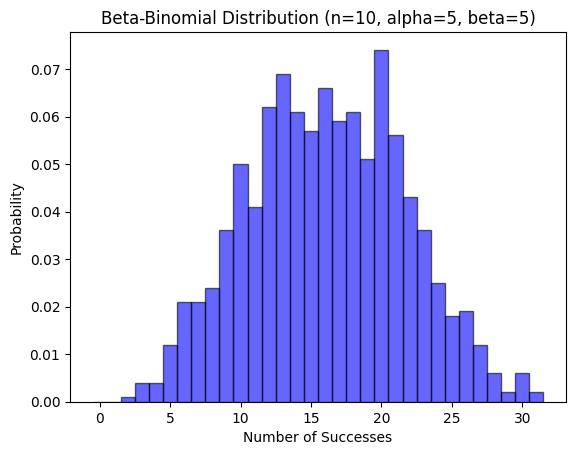

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Define parameters for the Beta distribution
alpha = 5  # Shape parameter (alpha > 0)

# Define parameters for the Binomial distribution
n = 32  # Number of trials

# Create a Beta-Binomial distribution object
beta = stats.betabinom(n, alpha, alpha, loc=0)

# Generate 1000 samples from the distribution
samples = beta.rvs(size=1000)

# Plot the histogram of the samples
plt.hist(samples, bins=np.arange(0, n + 1) - 0.5, density=True, alpha=0.6, color='b', edgecolor='black')

# Add labels and title to the plot
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Beta-Binomial Distribution (n=10, alpha=5, beta=5)')

# Show the plot
plt.show()

In [31]:
epsilon = beta.rvs()
epsilon

15

In [33]:
interval = round(32/epsilon)
interval

2

In [34]:
mask = indices % interval == 0
mask

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False])

In [35]:
lam = 1/interval
lam

0.5

## Putting it altogether

In [205]:
from scipy import stats

alpha = 5
n = 32

A = np.arange(20, 52)
B = np.arange(60, 92)

In [206]:
beta_binom = stats.betabinom(n, alpha, alpha, loc=0)

In [211]:
epsilon = beta_binom.rvs()
interval = round(n/epsilon)
lam = 1/interval


indices = np.arange(n)
mask = indices % interval == 0


result_array = np.where(mask, A, B)

# lam applies for A
print(f'{epsilon}, {interval}, {lam}')
print(mask)
print(A)
print(B)
print(result_array)

10, 3, 0.3333333333333333
[ True False False  True False False  True False False  True False False
  True False False  True False False  True False False  True False False
  True False False  True False False  True False]
[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45 46 47 48 49 50 51]
[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89 90 91]
[20 61 62 23 64 65 26 67 68 29 70 71 32 73 74 35 76 77 38 79 80 41 82 83
 44 85 86 47 88 89 50 91]


In [213]:
import torch

torch.randperm(32)

tensor([27,  9, 21, 13, 30, 26,  3, 10,  2, 17,  0, 25, 22, 28, 11, 12, 24, 29,
        23,  8,  6, 20, 31,  4,  7, 14, 19,  1, 16, 18, 15,  5])